In [42]:
import pandas as pd

In [43]:
new_atlanta_df = pd.read_csv('../Data/Clean/combined/Atlanta_combined.csv')
new_charlotte_df = pd.read_csv('../Data/Clean/combined/Charlotte_combined.csv')
new_cincinnati_df = pd.read_csv('../Data/Clean/combined/Cincinnati_combined.csv')
new_denver_df = pd.read_csv('../Data/Clean/combined/Denver_combined.csv')
new_indianapolis_df = pd.read_csv('../Data/Clean/combined/Indianapolis_combined.csv')
new_providence_df = pd.read_csv('../Data/Clean/combined/Providence_combined.csv')
new_tampa_df = pd.read_csv('../Data/Clean/combined/Tampa_combined.csv')

In [44]:
print(new_atlanta_df.head())
print(new_charlotte_df.head())
print(new_cincinnati_df.head())
print(new_denver_df.head())
print(new_indianapolis_df.head())
print(new_providence_df.head())
print(new_tampa_df.head())

         DATE  MeanSalePrice  SalesCount  TotalTransactionValue  \
0  2008-04-30       200954.0      6463.0           1.235943e+09   
1  2008-05-31       203419.0      6729.0           1.317605e+09   
2  2008-06-30       205746.0      7047.0           1.388670e+09   
3  2008-07-31       205553.0      7086.0           1.429205e+09   
4  2008-08-31       202855.0      6383.0           1.388101e+09   

   HomeValueIndex  HomeValueIndexSmSa  MarketTempIdx  DaysToClose  \
0   185168.707578       189442.061550            NaN          NaN   
1   185331.245765       188426.220342            NaN          NaN   
2   185185.095114       187437.288971            NaN          NaN   
3   184692.089305       186253.861325            NaN          NaN   
4   183376.364934       184882.815462            NaN          NaN   

   DaysOnZillow  ListingPriceCutAmt  ...  PctSoldBelowList  MORTGAGE15US  \
0           NaN                 NaN  ...               NaN         5.465   
1           NaN               

In [45]:
print(new_atlanta_df.isnull().sum())
print(new_charlotte_df.isnull().sum())
print(new_cincinnati_df.isnull().sum())
print(new_denver_df.isnull().sum())
print(new_indianapolis_df.isnull().sum())
print(new_providence_df.isnull().sum())
print(new_tampa_df.isnull().sum())

DATE                            0
MeanSalePrice                   0
SalesCount                      0
TotalTransactionValue           0
HomeValueIndex                  0
HomeValueIndexSmSa              0
MarketTempIdx                 117
DaysToClose                   117
DaysOnZillow                  119
ListingPriceCutAmt            119
ListingPriceCutPct            119
SaleToList                    119
NewConstructMeanSalePrice     117
NewConstructSalesCount        117
PctListingsPriceCut           119
PctSoldAboveList              119
PctSoldBelowList              119
MORTGAGE15US                    0
MORTGAGE30US                    0
RATE_DIFFERENCE                 0
NUM_JOBS                        4
GROWTH_PCT                      4
People25PlusThousands_2019      0
PctHighSchoolDiploma_2019       0
PctBachelorsDegree_2019         0
CityName                        0
dtype: int64
DATE                            0
MeanSalePrice                   0
SalesCount                      0
T

In [46]:
new_atlanta_df.columns

Index(['DATE', 'MeanSalePrice', 'SalesCount', 'TotalTransactionValue',
       'HomeValueIndex', 'HomeValueIndexSmSa', 'MarketTempIdx', 'DaysToClose',
       'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct',
       'SaleToList', 'NewConstructMeanSalePrice', 'NewConstructSalesCount',
       'PctListingsPriceCut', 'PctSoldAboveList', 'PctSoldBelowList',
       'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS',
       'GROWTH_PCT', 'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019',
       'PctBachelorsDegree_2019', 'CityName'],
      dtype='object')

In [47]:

# Select the columns that need normalization
columns_to_normalize = ['SalesCount', 'TotalTransactionValue','HomeValueIndex', 'HomeValueIndexSmSa','MarketTempIdx', 'DaysToClose','DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct','SaleToList', 'NewConstructMeanSalePrice', 'NewConstructSalesCount','PctListingsPriceCut', 'PctSoldAboveList', 'PctSoldBelowList','MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS','GROWTH_PCT', 'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019','PctBachelorsDegree_2019']

In [48]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [49]:
# Apply normalization to each city dataset
new_atlanta_df[columns_to_normalize] = scaler.fit_transform(new_atlanta_df[columns_to_normalize])
new_charlotte_df[columns_to_normalize] = scaler.fit_transform(new_charlotte_df[columns_to_normalize])
new_cincinnati_df[columns_to_normalize] = scaler.fit_transform(new_cincinnati_df[columns_to_normalize])
new_denver_df[columns_to_normalize] = scaler.fit_transform(new_denver_df[columns_to_normalize])
new_indianapolis_df[columns_to_normalize] = scaler.fit_transform(new_indianapolis_df[columns_to_normalize])
new_providence_df[columns_to_normalize] = scaler.fit_transform(new_providence_df[columns_to_normalize])
new_tampa_df[columns_to_normalize] = scaler.fit_transform(new_tampa_df[columns_to_normalize])

In [50]:
# Concatenate the data from all cities
combined_data = pd.concat([new_atlanta_df, new_charlotte_df, new_cincinnati_df, new_denver_df, new_indianapolis_df, new_providence_df, new_tampa_df])

# Drop any rows with missing data after the merge (if applicable)
combined_data.dropna(inplace=True)

In [51]:
print(combined_data.columns)

Index(['DATE', 'MeanSalePrice', 'SalesCount', 'TotalTransactionValue',
       'HomeValueIndex', 'HomeValueIndexSmSa', 'MarketTempIdx', 'DaysToClose',
       'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct',
       'SaleToList', 'NewConstructMeanSalePrice', 'NewConstructSalesCount',
       'PctListingsPriceCut', 'PctSoldAboveList', 'PctSoldBelowList',
       'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS',
       'GROWTH_PCT', 'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019',
       'PctBachelorsDegree_2019', 'CityName'],
      dtype='object')


In [53]:
# Define the features and the target
features = ['SalesCount','TotalTransactionValue','HomeValueIndex', 'HomeValueIndexSmSa', 'MarketTempIdx', 'DaysToClose','DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct','SaleToList', 'NewConstructMeanSalePrice', 'NewConstructSalesCount','PctListingsPriceCut', 'PctSoldAboveList', 'PctSoldBelowList','MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS','GROWTH_PCT', 'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019','PctBachelorsDegree_2019']
target = 'MeanSalePrice'

X = combined_data[features]  # Features
y = combined_data[target]    # Target (SalePrice)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [55]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 23) (103, 23) (408,) (103,)


In [56]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients to see the feature impacts
print("Model Coefficients:", model.coef_)

Model Coefficients: [-3.51460037e+04  1.43083790e+05  8.35284105e+05 -2.39478046e+05
 -1.07700279e+05 -2.65936361e+04  6.20152691e+04 -1.83117030e+05
  4.03292402e+04 -8.33217858e+05 -2.19481454e+05 -1.02361520e+05
 -1.28350174e+05  1.18789256e+06  3.58326862e+05 -2.08937419e+07
  2.16906873e+07 -3.42375697e+06  1.53430592e+05  3.32313356e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [57]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4846547676.947744
R-squared (R²): 0.6777528851452221


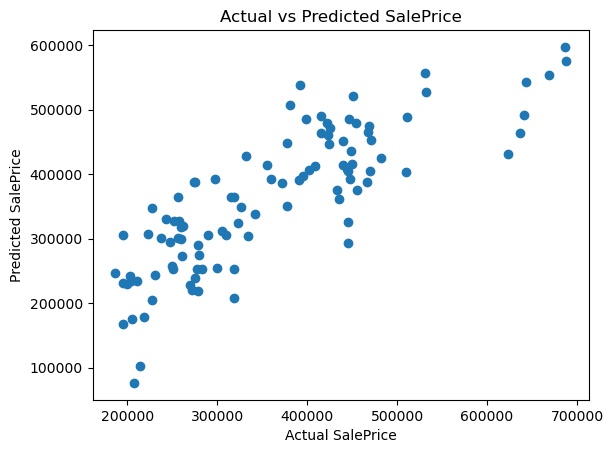

In [58]:
# Create a scatter plot to compare actual vs predicted SalePrice
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler

# Adding more features that could be predictive
features_extended = ['SalesCount','TotalTransactionValue','HomeValueIndex', 'HomeValueIndexSmSa', 'MarketTempIdx', 
                     'DaysToClose','DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct','SaleToList', 
                     'NewConstructMeanSalePrice', 'NewConstructSalesCount','PctListingsPriceCut', 'PctSoldAboveList', 
                     'PctSoldBelowList','MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS','GROWTH_PCT', 
                     'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019','PctBachelorsDegree_2019']

X_extended = combined_data[features_extended]
y = combined_data['MeanSalePrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_extended)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)

Random Forest - Mean Squared Error (MSE): 3676304233.7532177
Random Forest - R-squared (R²): 0.7555624102719103


In [64]:
# Adding additional features to the dataset
features_extended = ['SalesCount','TotalTransactionValue','HomeValueIndex', 'HomeValueIndexSmSa', 'MarketTempIdx', 
                     'DaysToClose','DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct','SaleToList', 
                     'NewConstructMeanSalePrice', 'NewConstructSalesCount','PctListingsPriceCut', 'PctSoldAboveList', 
                     'PctSoldBelowList','MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE', 'NUM_JOBS','GROWTH_PCT', 
                     'People25PlusThousands_2019', 'PctHighSchoolDiploma_2019','PctBachelorsDegree_2019']

X_extended = combined_data[features_extended]
y = combined_data['MeanSalePrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_extended)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)


Random Forest - Mean Squared Error (MSE): 3676304233.7532177
Random Forest - R-squared (R²): 0.7555624102719103


In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting - Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting - R-squared (R²):", r2_gb)


Gradient Boosting - Mean Squared Error (MSE): 3314000583.4141293
Gradient Boosting - R-squared (R²): 0.7796519919298902


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

# Calculate MSE and R-squared
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print("Tuned Random Forest - Mean Squared Error (MSE):", mse_rf_best)
print("Tuned Random Forest - R-squared (R²):", r2_rf_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_sa

SalesCount: 0.023708710584929068
TotalTransactionValue: 0.01283015404334806
HomeValueIndex: 0.08936775188550562
HomeValueIndexSmSa: 0.2628462304844547
MarketTempIdx: 0.031026226025979906
DaysToClose: 0.02706958013445794
DaysOnZillow: 0.012485243112075604
ListingPriceCutAmt: 0.019537289456023125
ListingPriceCutPct: 0.018252870691687312
SaleToList: 0.013971425513143905
NewConstructMeanSalePrice: 0.03457673870381257
NewConstructSalesCount: 0.15851563215007122
PctListingsPriceCut: 0.01608074741204634
PctSoldAboveList: 0.011516140589301211
PctSoldBelowList: 0.007399308070982013
MORTGAGE15US: 0.014969521534331365
MORTGAGE30US: 0.011032022058629043
RATE_DIFFERENCE: 0.008796603474674473
NUM_JOBS: 0.06640629856856278
GROWTH_PCT: 0.15961150550598377
People25PlusThousands_2019: 0.0
PctHighSchoolDiploma_2019: 0.0
PctBachelorsDegree_2019: 0.0


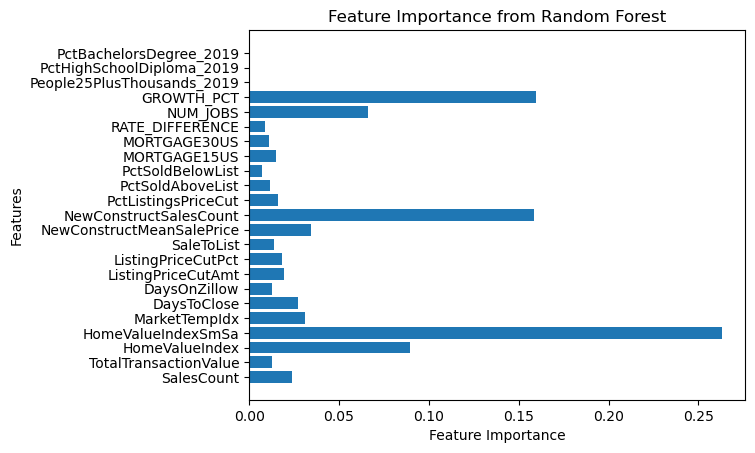

In [68]:
# Feature Importance for Random Forest
importances = best_rf_model.feature_importances_
feature_names = X_extended.columns

# Display feature importances
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

# You can plot feature importance for better visualization
import matplotlib.pyplot as plt
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


In [69]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train the model with the new polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [70]:
y

119    250479.0
120    259670.0
121    269809.0
122    276188.0
123    278034.0
         ...   
189    450808.0
191    452862.0
192    465390.0
193    471017.0
194    473695.0
Name: MeanSalePrice, Length: 511, dtype: float64

In [71]:
# Train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [72]:
# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)


In [73]:
# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)


print(f"Mean Squared Error (MSE) for Polynomial Features Model: {mse_poly}")
print(f"R-squared Score for Polynomial Features Model: {r2_poly}")

Mean Squared Error (MSE) for Polynomial Features Model: 2738806896.96846
R-squared Score for Polynomial Features Model: 0.8178966391086285


In [74]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)  # You can tune alpha
model_ridge.fit(X_train_poly, y_train_poly)
y_pred_ridge = model_ridge.predict(X_test_poly)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test_poly, y_pred_ridge)
r2_ridge = r2_score(y_test_poly, y_pred_ridge)

print(f"Mean Squared Error (MSE) for Ridge Regression Model: {mse_ridge}")
print(f"R-squared Score for Ridge Regression Model: {r2_ridge}")


Mean Squared Error (MSE) for Ridge Regression Model: 2972410514.2236004
R-squared Score for Ridge Regression Model: 0.8023643268942737


In [75]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train_poly, y_train_poly)
y_pred_lasso = model_lasso.predict(X_test_poly)

# Evaluate Lasso model
mse_lasso = mean_squared_error(y_test_poly, y_pred_lasso)
r2_lasso = r2_score(y_test_poly, y_pred_lasso)

print(f"Mean Squared Error (MSE) for Lasso Regression Model: {mse_lasso}")
print(f"R-squared Score for Lasso Regression Model: {r2_lasso}")


Mean Squared Error (MSE) for Lasso Regression Model: 2588406038.553079
R-squared Score for Lasso Regression Model: 0.8278967971441236


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+11, tolerance: 5.881e+08
  model = cd_fast.enet_coordinate_descent(
